In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import urllib2
import sklearn.mixture as mixture

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

In [9]:
print 'here'
def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

here


#### 1) plotting histograms of cleaned data

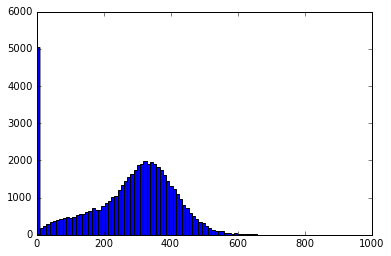

In [43]:
synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T
plt.hist(accurateData[:,3],bins=100)
plt.show()

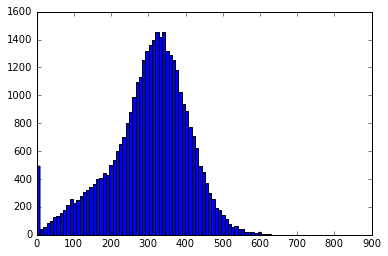

In [44]:
cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

plt.hist(cleaned[:,3], bins=100)
plt.show()

This looks like there is an optimal density for synapse/unmasked values at 340 or so.

#### 2) checking uniform density

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.
[ 2100389.83730626  2094880.86711892  2089231.58084591  2082509.05365677
  2082865.26575137  2080552.77251892  2079130.9167156   2072682.96711561
  2073693.65268158  2070258.81696901  2067993.11655309  2069618.33341027
  2068229.33463118  2067412.42425995]


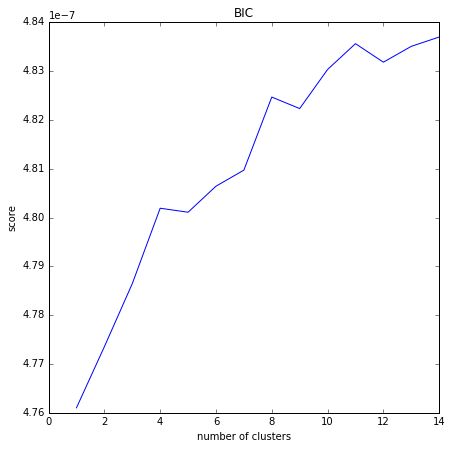

In [16]:
max_clusters = 15
bic = np.array([])
i = np.array(range(1, max_clusters))
for idx in range(1, max_clusters):
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag', random_state = 1)
    gmm.fit(cleaned)
    bic = np.append(bic, gmm.bic(cleaned))
plt.figure(figsize=(7,7))
plt.plot(i, 1.0/bic)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.show()

It looks like the optimal number of clusters is around 3 or 4.

#### 3) Check clusters isolating x, y, and z

Fitting and evaluating model with 1 clusters.
Fitting and evaluating model with 2 clusters.
Fitting and evaluating model with 3 clusters.
Fitting and evaluating model with 4 clusters.
Fitting and evaluating model with 5 clusters.
Fitting and evaluating model with 6 clusters.
Fitting and evaluating model with 7 clusters.
Fitting and evaluating model with 8 clusters.
Fitting and evaluating model with 9 clusters.
Fitting and evaluating model with 10 clusters.
Fitting and evaluating model with 11 clusters.
Fitting and evaluating model with 12 clusters.
Fitting and evaluating model with 13 clusters.
Fitting and evaluating model with 14 clusters.


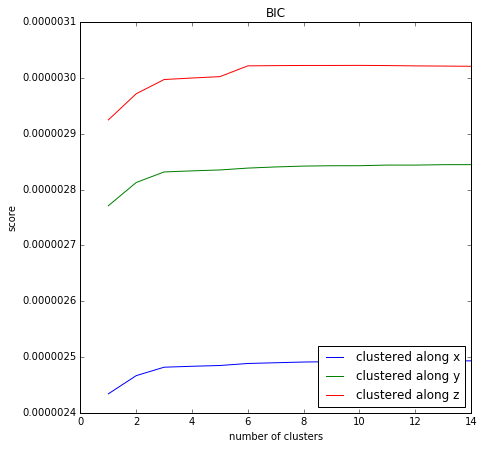

In [35]:
max_clusters = 15
cleaned[:,3] = np.divide(cleaned[:,3],64**3)
bicx = np.array([])
bicy = np.array([])
bicz = np.array([])
i = np.array(range(1, max_clusters))
for idx in range(1, max_clusters):
    print "Fitting and evaluating model with " + str(idx) + " clusters."
    gmm = mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag', random_state = 1)
    gmm.fit(cleaned[:,(0,3)])
    bicx = np.append(bicx, gmm.bic(cleaned[:,(0,3)]))
    
    gmm.fit(cleaned[:,(1,3)])
    bicy = np.append(bicy, gmm.bic(cleaned[:,(1,3)]))
    
    gmm.fit(cleaned[:,(2,3)])
    bicz = np.append(bicz, gmm.bic(cleaned[:,(2,3)]))
plt.figure(figsize=(7,7))
plt.plot(i, 1.0/bicx, i, 1.0/bicy, i, 1.0/bicz)
plt.title('BIC')
plt.ylabel('score')
plt.xlabel('number of clusters')
plt.legend(['clustered along x','clustered along y','clustered along z'],loc='lower right')
plt.show()
cleaned[:,3] = cleaned[:,3] * 64**3

It looks like these seem to have 3-4 clusters as well (closer to 3 in these).
Still =/= 0 so nonuniform.

### 3) Check cluster centers across z axis

finished slice: 55.0
finished slice: 166.0
finished slice: 277.0
finished slice: 388.0
finished slice: 499.0
finished slice: 610.0
finished slice: 721.0
finished slice: 832.0
finished slice: 943.0
finished slice: 1054.0
finished slice: 1165.0


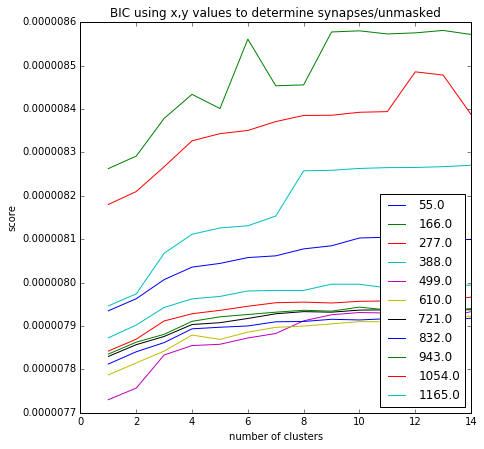

In [25]:
z_values = np.unique(cleaned[:,2])
plt.figure(figsize=(7,7))
for d in z_values:
    z_data = cleaned[cleaned[:,2] == d]
    max_clusters = 15
    bic = np.array([])
    i = np.array(range(1, max_clusters))
    for idx in range(1, max_clusters):
        gmm = mixture.GMM(n_components=idx,n_iter=1000,covariance_type='diag', random_state = 1)
        gmm.fit(z_data)
        bic = np.append(bic, gmm.bic(z_data))
    plt.plot(i, 1.0/bic)
    plt.title('BIC using x,y values to determine synapses/unmasked')
    plt.ylabel('score')
    plt.xlabel('number of clusters')
    print "finished slice: " + str(d)
plt.legend(z_values,loc='lower right')
plt.show()   
    
   

We can see that most z-values have an elbow at 4, where a few (e.g. purple seem to have 3 clusters).
This doesn't seem to match, hmmm.
There is some wiggle room between the correct numbers of clusters, so we will double check with kmeans.

#### 4) Kmeans clustering

Visually, the k-means clustering shows us some interesting data. It looks like 3 clusters might be the correct number.

Let's try to find a general trends in pathing from center to center of the clusters. This might give us an estimate for direction of change in clusters.

#### 5) vectors between cluster centers

Now that we have a general idea of the direction clusters are oriented in, lets check cluster center position across z-values.

#### 5) Checking position of centers of clusters, assuming 3 clusters

on level: 55.0
on level: 166.0
on level: 277.0
on level: 388.0
on level: 499.0
on level: 610.0
on level: 721.0
on level: 832.0
on level: 943.0
on level: 1054.0
on level: 1165.0


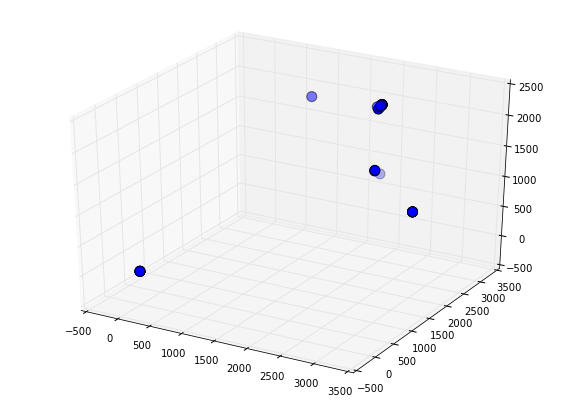

In [41]:
fig = plt.figure(figsize = (10,7))
ax = fig.gca(projection = '3d')
for d in z_values:
    z_data = cleaned[cleaned[:,2] == d]
    print 'on level: ' + str(d)
    gmm = mixture.GMM(n_components=3,n_iter=1000,covariance_type='diag', random_state = 1)
    gmm.fit(z_data[:,(0,1,3)])
    center_1 = ([gmm.means_[0][0],gmm.means_[0][1],gmm.means_[0][2]])
    center_2 = ([gmm.means_[1][0],gmm.means_[1][1],gmm.means_[1][2]])
    center_3 = ([gmm.means_[2][0],gmm.means_[2][1],gmm.means_[2][2]])
    ax.scatter(center_1, center_2, center_3, marker='o',s=100)
    plt.hold(True)
plt.show()

Looks like 3 clusters are more reasonable. Lets try stacking centers of clusters with 3.

#### 6) Cluster centers across z axis, with 3 clusters. + comparison

Hmm! That's strange how the bottom section behaves differently from the other sections. Those are probably the z balue BIC curves that had corners at 3.

Let's try to refine the gradient of synaptic density across axes

------------- Jay ---------------
#### any #